## Tarea 1_ Red neuronal Perceptrón multicapa  

En esta primera tarea es necesario que realicen  un clasificador de prendas de ropa  para esto será necesario usar el  conjunto de entrenamiento Fashion Mnist

Este conjunto está conformado por fotografías de 10 diferentes estilos de ropa en imagenes de 28X28 

El clasificador debe de ser capaz de separar adecuadamente las diferentes imágenes.  Con este tipo de red se tiene una expectativa de un 97%  de exactitud.

    - Realizar la red neuronal programada completamente con TensorFlow
    - Realizar la misma arquitectura con Keras  

Adjunto encontrarán el código que ya tiene incorporada la lectura del conjunto de datos


In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Lectura del conjunto de datos 

In [2]:
from tensorflow.keras.datasets.fashion_mnist import load_data

## Separando el conjunto de datos en Entrenamiento y prueba 

In [3]:
(x_train, y_train), (x_test, y_test) = load_data()

In [4]:
def num_to_onehot(num):
    arr = np.zeros(10)
    arr[num] = 1
    return arr

def convert_labels(nums):
    return np.array([num_to_onehot(num) for num in nums])

Analizando el conjunto de Fashion_mnist

In [5]:
def image_matrix(img):
    print('\n'.join([''.join(['{:4}'.format(item) for item in row]) 
      for row in img]))

x_train shape: (60000, 28, 28) y_train shape: (60000,)
x_test shape: (10000, 28, 28) y_test shape: (10000,)


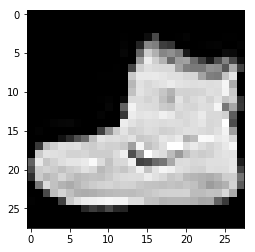

In [6]:
print("x_train shape:", x_train.shape, "y_train shape:", y_train.shape)
print("x_test shape:", x_test.shape, "y_test shape:", y_test.shape)
plt.imshow(x_train[0], cmap='gray')

In [7]:
image_matrix(x_train[0])

   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0   0   1   4   0   0   0   0   1   1   0
   0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62  54   0   0   0   1   3   4   0   0   3
   0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134 144 123  23   0   0   0   0  12  10   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178 107 156 161 109  64  23  77 130  72  15
   0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216 216 163 127 121 122 146 141  88 172  66
   0   0   0   0   0   0   0   0   0   1   1   1   0 200 232 232 233 229 223 223 215 213 164 127

Podemos Observar que el dataset no está normalizado, por ende se convertirá a una escala entre 0 y 1

x_train shape: (60000, 784) y_train shape: (60000, 10)
x_test shape: (10000, 784) y_test shape: (10000, 10)


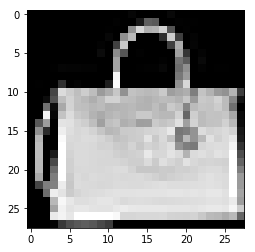

In [8]:
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255
x_train = x_train.reshape([60000, 28*28])
x_test = x_test.reshape([10000, 28*28])
y_train = convert_labels(y_train)
y_test = convert_labels(y_test)

print("x_train shape:", x_train.shape, "y_train shape:", y_train.shape)
print("x_test shape:", x_test.shape, "y_test shape:", y_test.shape)
imagendemo=np.reshape(x_test[30,:],(28,28))
plt.imshow(imagendemo,cmap='gray')

Las etiquetas numéricas pueden ser transformadas al nombre de la clase correspondiente usando el siguiente diccionario 

In [9]:
label_dict = {
 0: "T-shirt/top",
 1: "Trouser",
 2: "Pullover",
 3: "Dress",
 4: "Coat",
 5: "Sandal",
 6: "Shirt",
 7: "Sneaker",
 8: "Bag",
 9: "Ankle boot"
}

In [214]:
def Neural_network_model(
    n_nodes_hl1=128,
    n_nodes_hl2=128,
    n_nodes_hl3=128,
    n_classes=10,
    lr = 0.001
):
    # Declarando las entradas y salidas
    x=tf.placeholder('float',[None,784])
    y=tf.placeholder('float')
    
    # Declarando las variables 
    
    hidden_1_layer = {'weights' : tf.Variable(tf.random_normal([784, n_nodes_hl1])),
                      'biases' : tf.Variable(tf.random_normal([n_nodes_hl1]))}

    hidden_2_layer = {'weights' : tf.Variable(tf.random_normal([n_nodes_hl1, n_nodes_hl2])),
                      'biases' : tf.Variable(tf.random_normal([n_nodes_hl2]))}

    hidden_3_layer = {'weights' : tf.Variable(tf.random_normal([n_nodes_hl2, n_nodes_hl3])),
                     'biases' : tf.Variable(tf.random_normal([n_nodes_hl3]))}

    output_layer = {'weights' : tf.Variable(tf.random_normal([n_nodes_hl2, n_classes])),
                    'biases' : tf.Variable(tf.random_normal([n_classes]))}
    
    
    ### Declarando la arquitectura
    # l1 = relu(w1 * p + b1)
    l1 = tf.nn.relu(tf.add(tf.matmul(x, hidden_1_layer['weights']), hidden_1_layer['biases']))
    
    #l2 = relu(w2 * l1 + b2)
    l2 = tf.nn.relu(tf.add(tf.matmul(l1, hidden_2_layer['weights']), hidden_2_layer['biases']))

    # l3 = relu(w3 * l2 + b3)
    l3 = tf.nn.relu(tf.add(tf.matmul(l2, hidden_3_layer['weights']), hidden_3_layer['biases']))

    # output = w * l3 + b 
    output = tf.add(tf.matmul(l2, output_layer['weights']), output_layer['biases'])
    
    # Declarando la funcion de costo y optimizador
    cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=output
           , labels=y) )
    optimizer = tf.train.AdamOptimizer(lr).minimize(cost)
    
    return dict(
              x=x,
              y=y,
              output=output,
              cost=cost,
              optimizer=optimizer
              )


In [182]:
Neural_network_model()

{'x': <tf.Tensor 'Placeholder_294:0' shape=(?, 784) dtype=float32>,
 'y': <tf.Tensor 'Placeholder_295:0' shape=<unknown> dtype=float32>,
 'output': <tf.Tensor 'Add_410:0' shape=(?, 10) dtype=float32>,
 'cost': <tf.Tensor 'Mean_279:0' shape=() dtype=float32>,
 'optimizer': <tf.Operation 'Adam_142' type=NoOp>}

In [183]:
def train_neural_network(DNN, hm_epochs=10, batch_size=100):
    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())

        for epoch in range(hm_epochs):
            
            epoch_loss = 0
            for current_batch in range(int(len(x_train) / batch_size)):
                epoch_x = x_train[current_batch * batch_size : (current_batch + 1) * batch_size]
                epoch_y = y_train[current_batch * batch_size : (current_batch + 1) * batch_size]
                feed_dict={DNN["x"]: epoch_x, 
                           DNN["y"]: epoch_y}
                _, c, prediction,y   = sess.run([DNN["optimizer"], DNN["cost"]
                                                 , DNN["output"], DNN["y"]], 
                                                feed_dict=feed_dict)
                epoch_loss += c

            print('Epoch', epoch, 'completed out of',hm_epochs,'loss:',epoch_loss)      
        #Prueba con datos nunca antes vistos  
        prediction, y = sess.run([DNN["output"], DNN["y"]], feed_dict={DNN["x"]:x_test, DNN["y"]:y_test})
        correct = tf.equal(tf.argmax(prediction, 1), tf.argmax(y, 1))
        accuracy = tf.reduce_mean(tf.cast(correct, 'float'))
        print('Accuracy:', accuracy.eval())

0.8722
DNN=Neural_network_model(lr=0.002, 
                         n_nodes_hl1=415,
                         n_nodes_hl2=400
                        )
train_neural_network(DNN, hm_epochs=160, batch_size=220)

In [243]:
DNN=Neural_network_model(lr=0.002, 
                         n_nodes_hl1=430,
                         n_nodes_hl2=430 
                        )
train_neural_network(DNN, hm_epochs=160, batch_size=220)

Epoch 0 completed out of 160 loss: 70059.83624267578
Epoch 1 completed out of 160 loss: 24846.77335357666
Epoch 2 completed out of 160 loss: 18084.853073120117
Epoch 3 completed out of 160 loss: 13592.499898910522
Epoch 4 completed out of 160 loss: 10957.98071861267
Epoch 5 completed out of 160 loss: 8788.518594741821
Epoch 6 completed out of 160 loss: 7454.193305015564
Epoch 7 completed out of 160 loss: 6329.3047795295715
Epoch 8 completed out of 160 loss: 5490.286880016327
Epoch 9 completed out of 160 loss: 4942.4632959365845
Epoch 10 completed out of 160 loss: 4252.645440578461
Epoch 11 completed out of 160 loss: 4103.245660305023
Epoch 12 completed out of 160 loss: 3568.115049600601
Epoch 13 completed out of 160 loss: 3279.577351331711
Epoch 14 completed out of 160 loss: 3157.990337371826
Epoch 15 completed out of 160 loss: 2932.439615011215
Epoch 16 completed out of 160 loss: 2620.1460258960724
Epoch 17 completed out of 160 loss: 2224.8410252332687
Epoch 18 completed out of 160 lo

Epoch 150 completed out of 160 loss: 175.02946912774735
Epoch 151 completed out of 160 loss: 216.5819627981337
Epoch 152 completed out of 160 loss: 190.5480062486236
Epoch 153 completed out of 160 loss: 194.52674235777778
Epoch 154 completed out of 160 loss: 206.1612397032419
Epoch 155 completed out of 160 loss: 156.64893317184848
Epoch 156 completed out of 160 loss: 191.1074864391162
Epoch 157 completed out of 160 loss: 203.06302834325066
Epoch 158 completed out of 160 loss: 177.23883366780984
Epoch 159 completed out of 160 loss: 241.75228138804232
Accuracy: 0.8715
